In [1]:
# Read data from external file
import pandas as pd
dfCSV = pd.read_csv("KF2TRAIN.csv")

dfCSV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 400 non-null    int64 
 1   Residential         400 non-null    object
 2   EmploymentStatus    400 non-null    object
 3   MaritalStatus       400 non-null    object
 4   HouseholdCategory   400 non-null    object
 5   OftenTravel         400 non-null    object
 6   TravellingFor       400 non-null    object
 7   YearlyTravel        400 non-null    int64 
 8   StayDuration        400 non-null    int64 
 9   PeopleDuringTravel  400 non-null    int64 
 10  LodgingBudget       400 non-null    int64 
 11  LodgingLocation     400 non-null    object
 12  LodgingType         400 non-null    object
dtypes: int64(5), object(8)
memory usage: 40.8+ KB


In [2]:
dfCSV.head()

,Age,Residential,EmploymentStatus,MaritalStatus,HouseholdCategory,OftenTravel,TravellingFor,YearlyTravel,StayDuration,PeopleDuringTravel,LodgingBudget,LodgingLocation,LodgingType
0,25,Urban,Employed full-time,Single,M40,No,Businesses,3,4,4,800,City Centers,Hotels
1,25,Rural,Employed full-time,Single,M40,No,Holiday,3,3,7,700,Countryside,Hotels
2,21,Urban,Student,Single,B40,Yes,Holiday,2,3,6,900,Countryside,Airbnb
3,21,Rural,Student,Single,B40,Yes,Holiday,2,5,4,500,Nature,Airbnb
4,39,Rural,Employed full-time,Married,M40,No,Both,4,7,6,1000,City Centers,Hotels


In [40]:
## Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Residential','EmploymentStatus','MaritalStatus','HouseholdCategory','OftenTravel','TravellingFor','LodgingLocation','LodgingType']
le = LabelEncoder()
for i in var_mod:
    dfCSV[i] = le.fit_transform(dfCSV[i])
    
dfCSV.head()

,Age,Residential,EmploymentStatus,MaritalStatus,HouseholdCategory,OftenTravel,TravellingFor,YearlyTravel,StayDuration,PeopleDuringTravel,LodgingBudget,LodgingLocation,LodgingType
0,25,1,0,1,1,0,1,3,4,4,800,1,1
1,25,0,0,1,1,0,2,3,3,7,700,2,1
2,21,1,4,1,0,1,2,2,3,6,900,2,0
3,21,0,4,1,0,1,2,2,5,4,500,3,0
4,39,0,0,0,1,0,0,4,7,6,1000,1,1


In [42]:
#Data slicing

#x = dfCSV.iloc[:, [1,3,4,5,6,7,8,9,10,11,12]]

x = dfCSV.drop(['LodgingType'], axis = 1)
y = dfCSV.iloc[:, [12]]
x.head()

# Convert dataframe to array
x = x.values
y = y.values
y = y.ravel()


In [43]:
# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
ModelKITA = KNeighborsClassifier(p=2,n_neighbors=11,weights='distance')

ModelKITA.fit(x, y)
yPred = ModelKITA.predict(x)


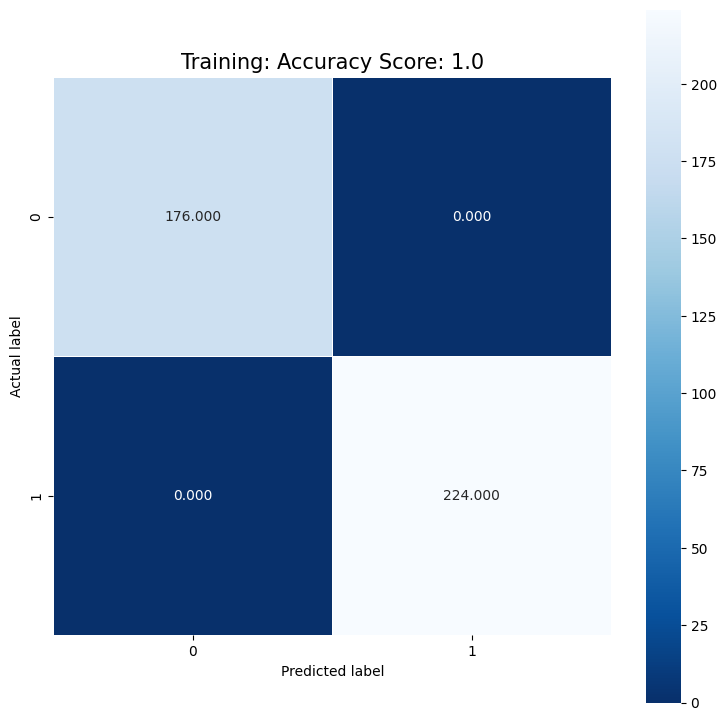

In [13]:
# Testing & performance analysis -Trainning data
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);


In [44]:
# Read data from external file
import pandas as pd
dfCSV2 = pd.read_csv("KF2TEST.csv")


dfCSV2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 100 non-null    int64 
 1   Residential         100 non-null    object
 2   EmploymentStatus    100 non-null    object
 3   MaritalStatus       100 non-null    object
 4   HouseholdCategory   100 non-null    object
 5   OftenTravel         100 non-null    object
 6   TravellingFor       100 non-null    object
 7   YearlyTravel        100 non-null    int64 
 8   StayDuration        100 non-null    int64 
 9   PeopleDuringTravel  100 non-null    int64 
 10  LodgingBudget       100 non-null    int64 
 11  LodgingLocation     100 non-null    object
 12  LodgingType         100 non-null    object
dtypes: int64(5), object(8)
memory usage: 10.3+ KB


In [45]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Residential','EmploymentStatus','MaritalStatus','HouseholdCategory','OftenTravel','TravellingFor','LodgingLocation','LodgingType']
le = LabelEncoder()
for i in var_mod:
    dfCSV2[i] = le.fit_transform(dfCSV2[i])


dfCSV2.head()


,Age,Residential,EmploymentStatus,MaritalStatus,HouseholdCategory,OftenTravel,TravellingFor,YearlyTravel,StayDuration,PeopleDuringTravel,LodgingBudget,LodgingLocation,LodgingType
0,23,1,1,0,1,0,2,1,3,6,450,1,1
1,21,1,3,1,0,0,1,2,3,5,700,3,0
2,25,1,0,1,0,1,2,1,3,4,100,2,1
3,18,0,3,1,0,0,2,2,3,11,400,2,0
4,25,0,0,1,0,0,1,1,3,4,200,2,0


In [46]:
#Data slicing

x2 = dfCSV2.drop(['LodgingType'], axis = 1)
y2 = dfCSV2.iloc[:, [12]]
x2.head()

,Age,Residential,EmploymentStatus,MaritalStatus,HouseholdCategory,OftenTravel,TravellingFor,YearlyTravel,StayDuration,PeopleDuringTravel,LodgingBudget,LodgingLocation
0,23,1,1,0,1,0,2,1,3,6,450,1
1,21,1,3,1,0,0,1,2,3,5,700,3
2,25,1,0,1,0,1,2,1,3,4,100,2
3,18,0,3,1,0,0,2,2,3,11,400,2
4,25,0,0,1,0,0,1,1,3,4,200,2


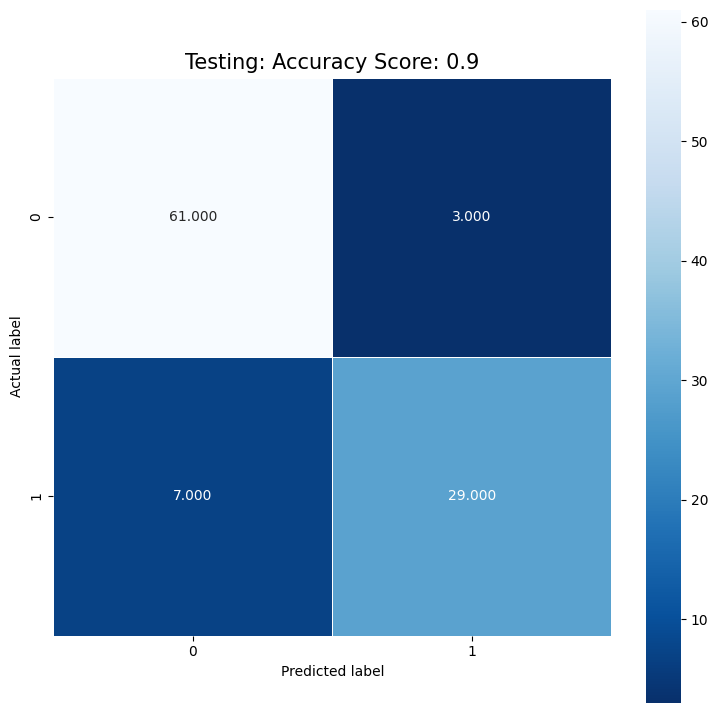

In [47]:
# Convert dataframe to array
x2 = x2.values
y2 = y2.values
y2 = y2.ravel()

yPred2 = ModelKITA.predict(x2)

# Testing & performance analysis -Testing data
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5,square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2))
plt.title(all_sample_title, size = 15);

In [52]:
# Applying the Classification Model in Application
#Age=23, Residential=Urban, EmploymentStatus=Employed-fulltime,	MaritalStatus=Single, HouseholdCategory=M40, OftenTravel=No
#TravellingFor=Business, YearlyTravel=2, StayDuration=6, PeopleDuringTravel=3, LodgingBudget=500, LodgingLocation=Countryside
newData = [[23, 1, 0, 1, 1, 0, 1, 2, 6, 3, 500, 2]]
predictionResult = ModelKITA.predict(newData);

if( predictionResult == 0):
    print("Prediction result = Airbnb ")
else: 
    print("Prediction result = Hotels")


Prediction result = Airbnb 


In [51]:
# Applying the Classification Model in Application
#Age=33, Residential=Urban, EmploymentStatus=Employed-fulltime,	MaritalStatus=Married, HouseholdCategory=M40, OftenTravel=No, 
#TravellingFor=Business, YearlyTravel=3, StayDuration=4, PeopleDuringTravel=4, LodgingBudget=800, LodgingLocation=City Centers
newData = [[33, 1, 0, 0, 1, 0, 1, 2, 6, 3, 800, 1]]
predictionResult = ModelKITA.predict(newData);

if( predictionResult == 1):
    print("Prediction result = Hotels ")
else: 
    print("Prediction result = Airbnb")


Prediction result = Hotels 
